In [1]:
from PIL import Image
import numpy as np
from iminuit import Minuit


import matplotlib

import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams.update({'font.size': 18})

In [19]:
# img = Image.open('demo/ocean_pano.jpg')
img = Image.open('demo/beach-ocean-panorama-187916.jpg')

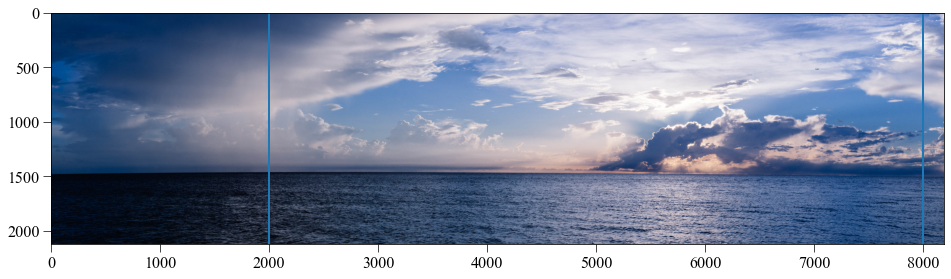

In [20]:
plt.imshow(img)
plt.axvline(x=2000)
plt.axvline(x=8000)
plt.show()

In [21]:
arry = img.getdata()

In [22]:
im_arr = np.fromstring(img.tobytes(), dtype=np.uint8)
im_arr = im_arr.reshape((img.size[1], img.size[0], 3)) 

/var/folders/bt/hcx3fsms41nfk08g1d3xy8t40000gn/T/ipykernel_31802/3829475553.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr = np.fromstring(img.tobytes(), dtype=np.uint8)


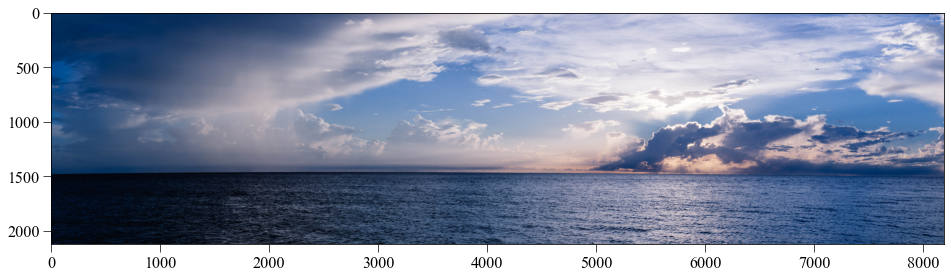

In [23]:
plt.imshow(im_arr)
plt.show()

In [118]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [119]:
pix_list = im_arr.reshape((im_arr.shape[0] * im_arr.shape[1], im_arr.shape[2]))

In [120]:
pix_list.shape

(17408000, 3)

In [126]:
km = KMeans(n_clusters=2)
km.fit(pix_list[::10])

KMeans(n_clusters=2)

In [127]:
classed = km.predict(pix_list)

In [128]:
recon = classed.reshape(im_arr.shape[:2])

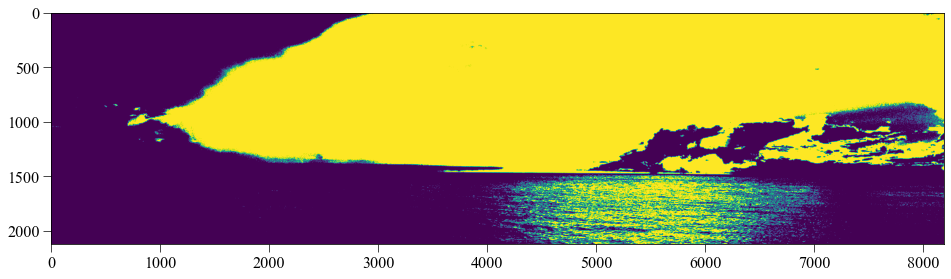

In [129]:
plt.imshow(recon)
plt.show()

/var/folders/bt/hcx3fsms41nfk08g1d3xy8t40000gn/T/ipykernel_47054/2546945504.py:1: RuntimeWarning: divide by zero encountered in log10
  grad = np.log10(abs(np.gradient(im_arr.sum(axis=2), axis=0)))


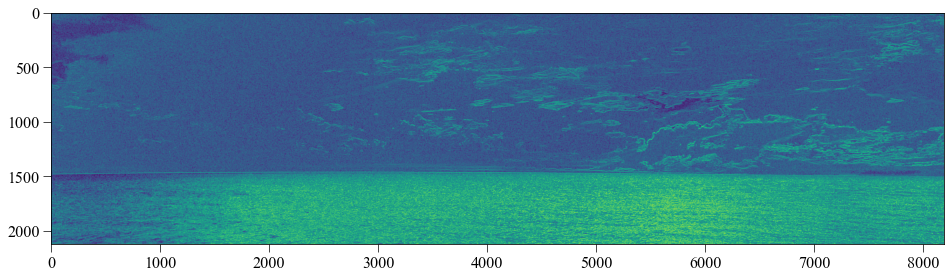

In [79]:
grad = np.log10(abs(np.gradient(im_arr.sum(axis=2), axis=0)))
grad[np.isinf(grad)] = 0
plt.imshow(grad)
# plt.colorbar()
plt.show()

In [150]:
from scipy.signal import savgol_filter

In [153]:
grad.shape[0], y.shape

(2832, (2832, 4256))

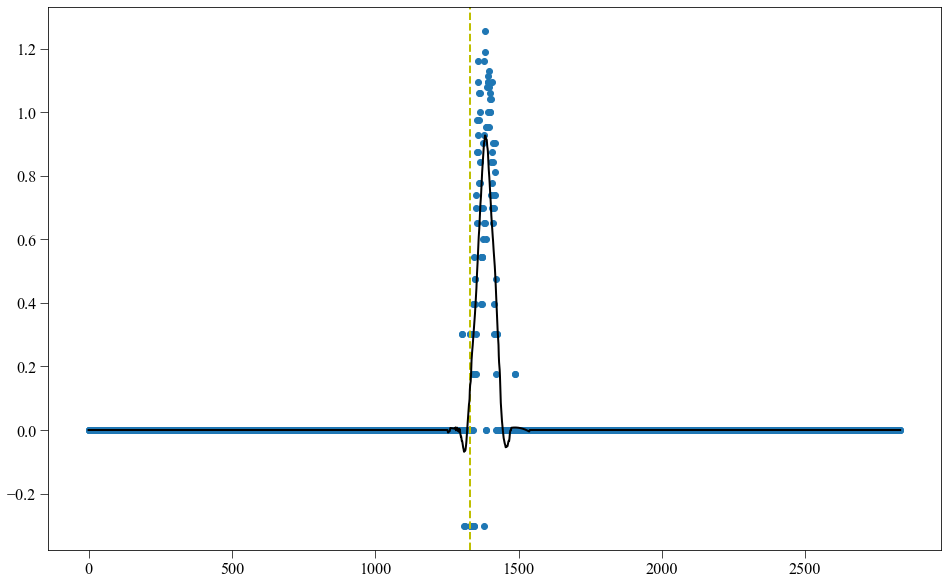

In [155]:
y = grad[:, 2000]
y[np.isinf(y)] = 0

yhat = savgol_filter(y, 101, 3)

yhathat = np.diff(yhat)
m = np.argmax(yhathat)

plt.axvline(x=m, c='y', ls='--')

plt.scatter(np.arange(grad.shape[0]), y)
plt.plot(np.arange(grad.shape[0]), yhat, c='k')

plt.show()

In [156]:
# def find_break(image, buffer=1500):
    
#     breaks = []
#     for i in range(image.shape[1]):
    
#         y = grad[:, i]
#         y[np.isinf(y)] = 0

#         yhat = savgol_filter(y, 101, 3)

#         yhathat = np.diff(yhat)
#         m = np.argmax(yhathat[buffer:-(buffer+300)])
# #         m = np.argmax(yhathat)

#         breaks += [m+buffer]
        
#     return np.array(breaks)

def find_break(image, y_min=0, y_max=-1):        
    
    breaks = []
    for i in range(image.shape[1]):
    
        y = grad[:, i]
        y[np.isinf(y)] = 0

        yhat = savgol_filter(y, 101, 3)

        yhathat = np.diff(yhat)
        m = np.argmax(yhathat[y_min:y_max])
#         m = np.argmax(yhathat)

        breaks += [m+y_min]
        
    return np.array(breaks)

# breaks = find_break(grad)
# breaks = find_break(grad, y_min=1510, y_max=1550)

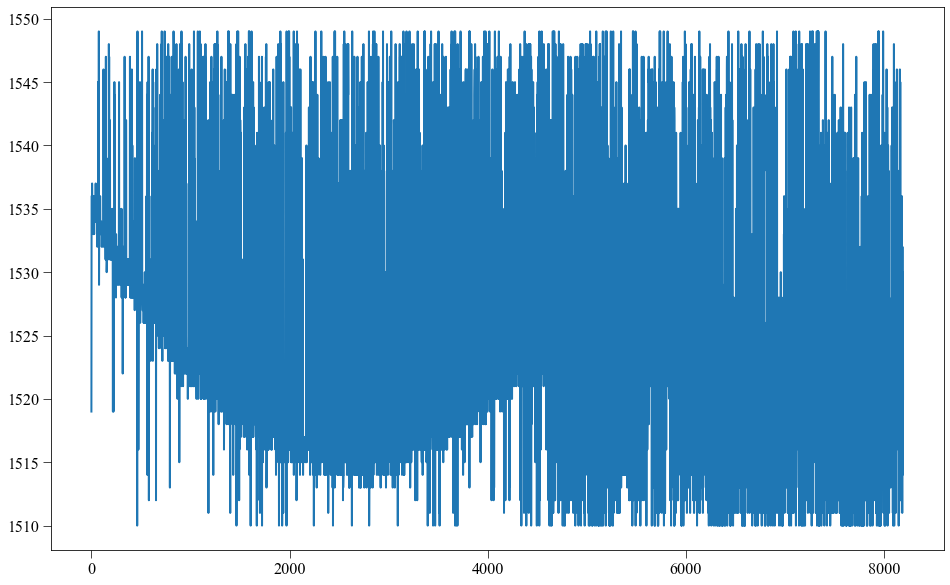

In [134]:
# plt.imshow(grad)
plt.plot(np.arange(grad.shape[1]), breaks)
plt.show()

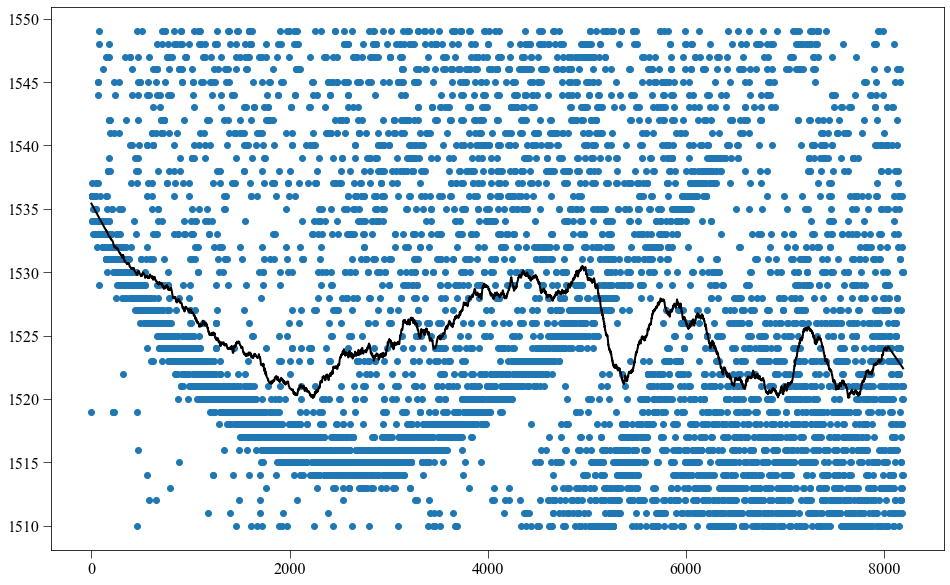

In [158]:
y = breaks.copy()

# yhat = savgol_filter(y, 901, 1)
yhat = savgol_filter(y, 301, 1)


plt.scatter(np.arange(grad.shape[1]), y)
plt.plot(np.arange(grad.shape[1]), yhat, c='k')

plt.show()

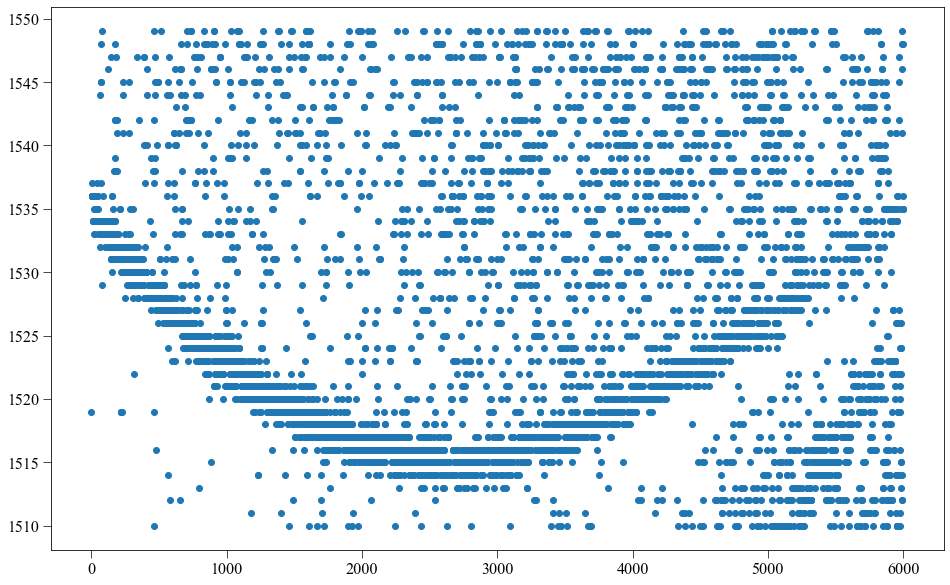

In [138]:
# cut = breaks[(breaks < 1920) & (breaks > 1780)][2000:8000]
cut = breaks[:6000]
plt.scatter(np.arange(len(cut)), cut)
plt.show()

In [111]:
cut = breaks

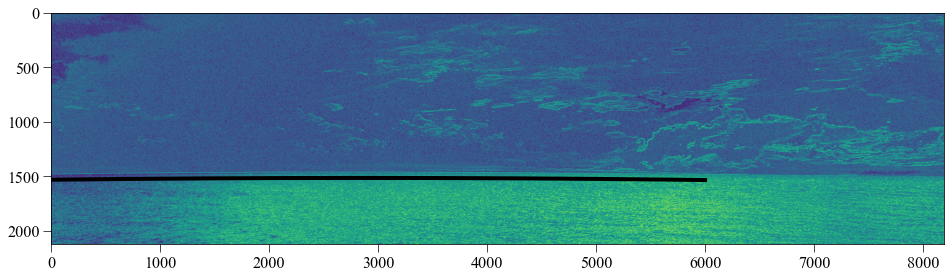

In [189]:
plt.imshow(grad)
coeff, cov = np.polyfit(np.arange(len(cut)), cut, 2, cov=True)
# coeff[0] = 0
coeff = [2e-6, -1.15e-2, 1.532e3]
y_fit = np.poly1d(coeff)(np.arange(len(cut)))

# plt.scatter(np.arange(len(cut))+2000, cut)
# plt.plot(np.arange(len(cut))+2000, y_fit, c='k', lw=4)
plt.plot(np.arange(len(cut)), y_fit, c='k', lw=4)
plt.show()

In [159]:
coeff

array([ 6.29329456e-07, -3.91791683e-03,  1.53037289e+03])

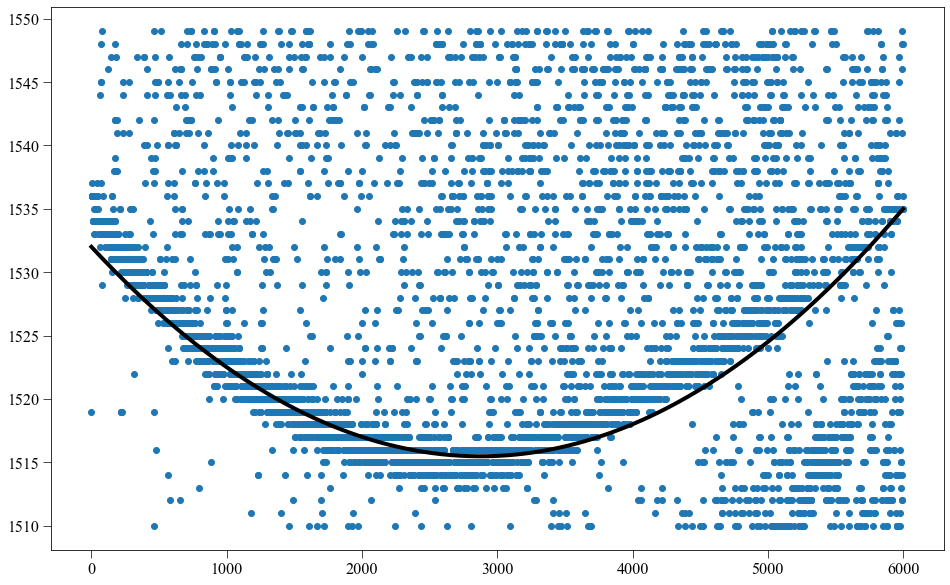

In [188]:
plt.scatter(np.arange(len(cut)), cut)
# plt.plot(np.arange(len(cut)), y_fit, c='k', lw=4)
plt.plot(np.arange(len(cut)), np.poly1d([2e-6, -1.15e-2, 1.532e3])(np.arange(len(cut))), c='k', lw=4)
plt.show()

In [140]:
coeff, cov

(array([ 6.29329456e-07, -3.91791683e-03,  1.53037289e+03]),
 array([[ 2.43670382e-15, -1.46177862e-11,  1.46129136e-08],
        [-1.46177862e-11,  9.35401880e-08, -1.05204210e-04],
        [ 1.46129136e-08, -1.05204210e-04,  1.57793167e-01]]))

In [141]:
grad.shape[0] - coeff[-1]

594.6271074008232

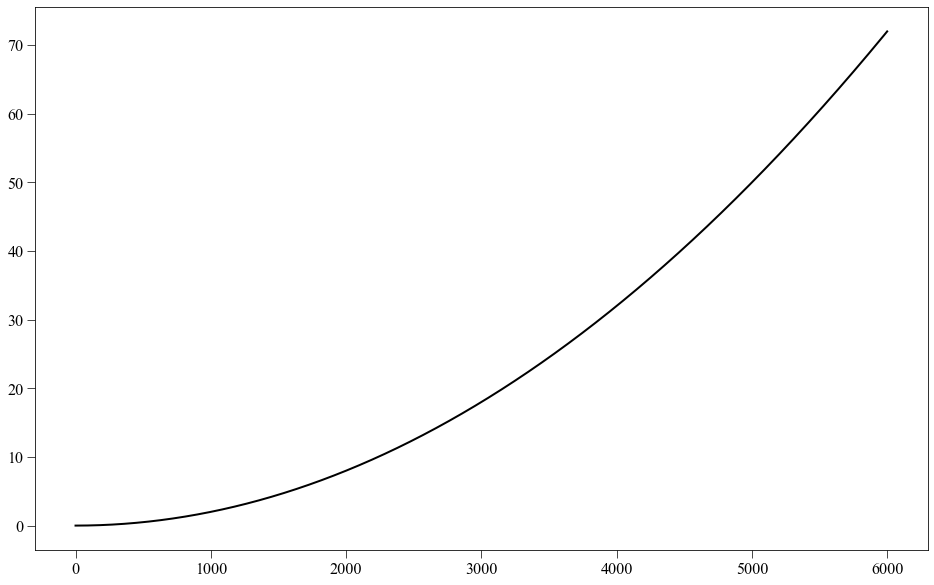

In [190]:
flat = coeff.copy()
flat[1] = 0
flat[2] = 0
y_fit = np.poly1d(flat)(np.arange(len(cut)))

plt.plot(np.arange(len(cut)), y_fit, c='k')
plt.show()

In [192]:
# number of pixels lost over the fit range with just the curvature component
min(y_fit)
max(y_fit)

71.976002

In [ ]:
# if we are losing 35 for every 6k pixels, we just need to know how far 6k pixels is


In [ ]:
# easy to get how many pixels it takes to go round the world, but km?

In [195]:
th = np.tan(abs(max(abs(y_fit)) / len(y_fit)))
th

0.011996575790697555

In [196]:
angle = th / 6000

26300


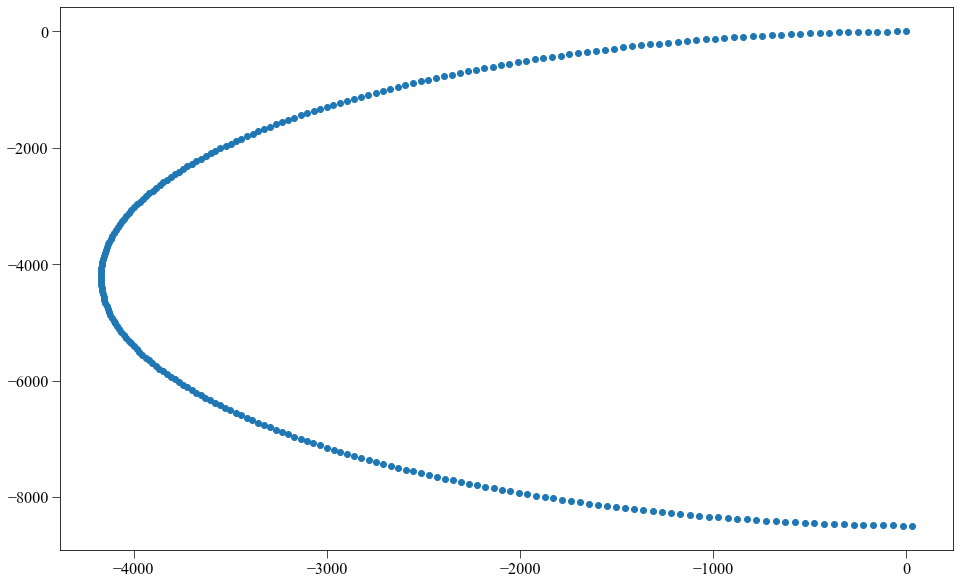

In [200]:
coords, circ = step_rad(stepsize=50, angle=angle)
print(circ)

plt.scatter(coords[:, 0], coords[:, 1])
plt.show()

In [44]:
th = np.arctan(0.006)
th

0.00599992800155516

In [45]:
0.006*5 * np.sin(th)

0.0001799967600874774

In [67]:
th*20 * np.sin(th)

0.0007002895853529242

In [46]:
6000 * 1e-6

0.006

5190
21200


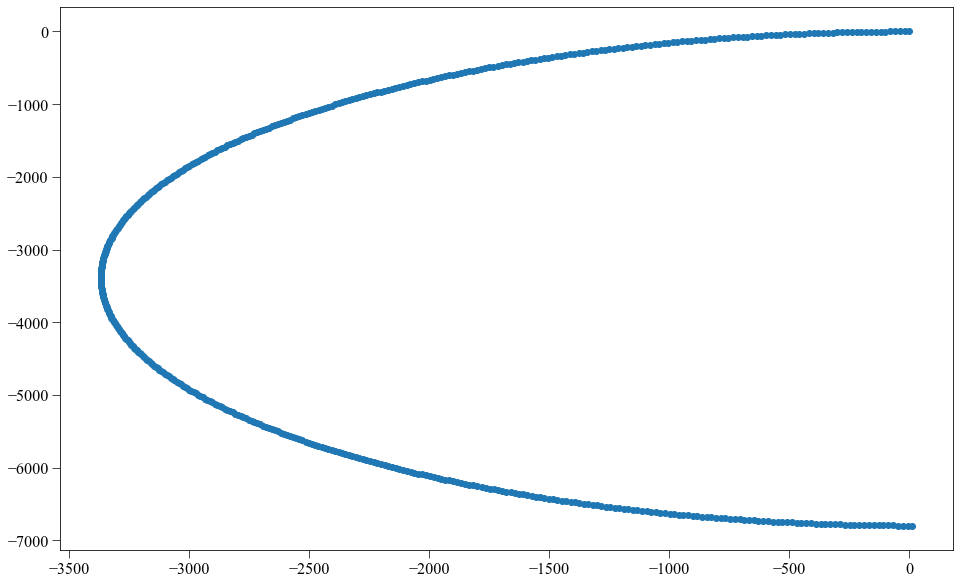

In [49]:
def step_rad(stepsize=5, angle=1e-6):
    
    d1 = 6000 * angle
    
    dev = d1 * stepsize
    
    coords = [[0, 0]]
    adj = coords[-1].copy()
    adj[0] -= stepsize
    adj[1] -= dev
    coords += [adj]
        
#     for i in range(1, n_steps):
        
    i = 0
    while coords[-1][0] < 0:
        i += 1
        prev = coords[i - 1].copy()
        current = coords[i].copy()
        dy = (current[1] - prev[1])
        dx = (current[0] - prev[0])
        
        midpoint = [prev[0] + 2*dx, prev[1] + 2*dy]
        
        m = dy / dx
        a = -1. / m
        
        th = np.arctan(a)
        dy2 = dev * np.sin(th)
        dx2 = dev * np.cos(th)
        
        next_point = [midpoint[0] + dx2, midpoint[1] + dy2]
        
        coords += [next_point]
    
    return np.array(coords), len(coords) * stepsize * 2

coords, circ = step_rad(stepsize=5, angle=1.01e-6)
print(circ)
coords, circ = step_rad(stepsize=20, angle=0.99e-6)
print(circ)

plt.scatter(coords[:, 0], coords[:, 1])
plt.show()

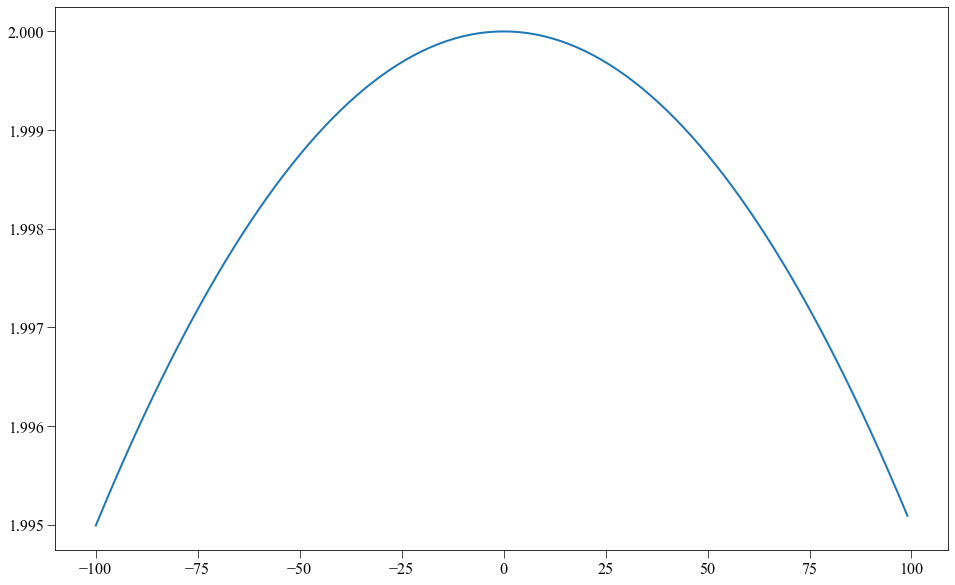

In [591]:
def intrinsic_transform(world_coords, f=1, px=1, py=1, x0=0, y0=0):
    Mi = np.array([
        [float(f)/px, 0, x0, 0],
        [0, float(f)/py, y0, 0],
        [0, 0, 1, 0]
    ])
        
    # todo allow for shear/etc.    
    
    camera_coords = []
    for i in range(len(world_coords)):
        camera_coords += [Mi @ world_coords[i, :]]
    camera_coords = np.array(camera_coords)
    
    return camera_coords


def extrinsic_transform(world_coords,
                        theta_x=0, theta_y=0, theta_z=0,
                        origin_x=0, origin_y=0, origin_z=0):
    
    """
    origin_x (world coords center in camera coords)
    """
    
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta_x), -np.sin(theta_x)],
        [0, np.sin(theta_x), np.cos(theta_x)]
    ])
    
    Ry = np.array([
        [np.cos(theta_y), 0, np.sin(theta_y)],
        [0, 1, 0],
        [-np.sin(theta_y), 0, np.cos(theta_y)]
    ])
    
    Rz = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0],
        [np.sin(theta_z), np.cos(theta_z), 0],
        [0, 0, 1]
    ])
    
    rotation = Rx @ Ry @ Rz
    
    translation = np.array([origin_x, origin_y, origin_z])
    
    # see https://en.wikipedia.org/wiki/Camera_resectioning
    transform = np.zeros((4, 4))
    transform[:3, :3] = rotation
    transform[:3, 3] = translation
    transform[3, 3] = 1
        
    camera_coords = []
    for i in range(len(world_coords)):
        camera_coords += [transform @ world_coords[i, :]]
    camera_coords = np.array(camera_coords)
    
    return camera_coords


def limb_arc(x, r, h=1,
             method='resection', screen_dist=1,
             f=1, px=1, py=1, x0=0, y0=0,
             theta_x=0, theta_y=0, theta_z=0,
             origin_x=0, origin_y=0, origin_z=0
             ):
    
    # diffraction correction?
#     r = r * 1.2
        
    d = np.sqrt(h**2 + 2*h*r)
    theta = np.arccos(r / (r + h))

    xdcostheta = np.clip(x / (d * np.cos(theta)), -1, 1) # to avoid out of bounds
#     xdcostheta = x / (d * np.cos(theta))
    y_world = d * np.cos(np.arcsin(xdcostheta)) * np.sin(theta)
                   
    if method == 'screen':
        y_camera = y_world * screen_dist / np.sqrt(d**2 - y_world**2)
    elif method == 'resection':
        x_world = d * np.sin(np.arcsin(xdcostheta)) * np.cos(theta)
        z_world = d * np.cos(np.arcsin(xdcostheta)) * np.cos(theta)
        
        world_coords = np.ones((len(x), 4))
        world_coords[:, 0] = x_world
        world_coords[:, 1] = y_world
        world_coords[:, 2] = z_world
        # todo worth a 3d scatter demo of world coords?
        
        camera_coords = extrinsic_transform(world_coords,
                                            theta_x=theta_x, theta_y=theta_y, theta_z=theta_z,
                                            origin_x=origin_x, origin_y=origin_y, origin_z=origin_z)
        camera_coords = intrinsic_transform(camera_coords, f=f, px=px, py=py,
                                            x0=x0, y0=y0)
        
        y_camera = camera_coords[:, 1]
    
    return y_camera

y = limb_arc(np.arange(-100, 100), 1e6, method='resection')
plt.plot(np.arange(-100, 100), y)
plt.show()

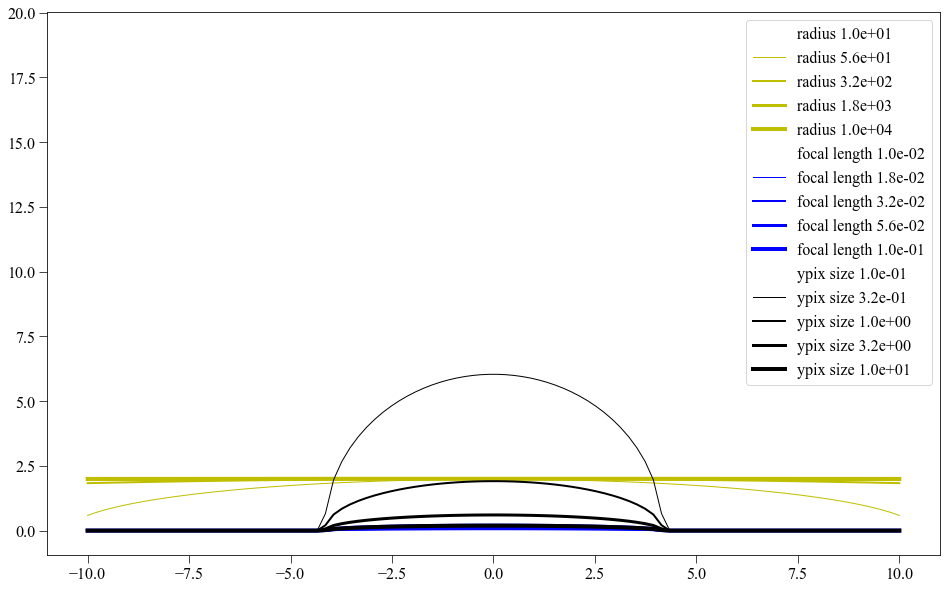

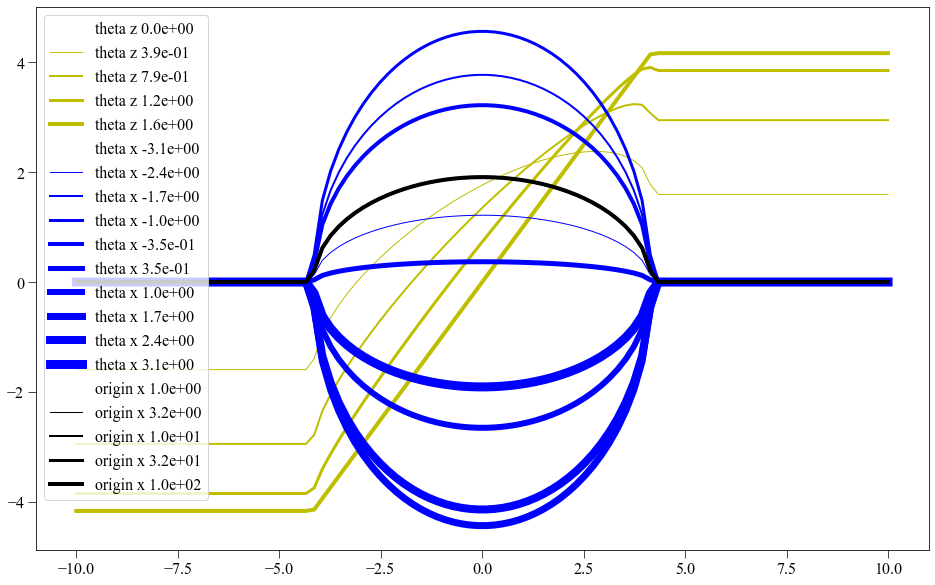

In [592]:
x = np.linspace(-10, 10, 100)

for i, r in enumerate(np.logspace(1, 4, num=5)):
#     y = limb_arc(x, r, h=1, method='screen', screen_dist=1)
    y = limb_arc(x, r, method='resection', f=1, px=1, py=1, x0=0, y0=0)
    plt.plot(x, y, label=f'radius {r:.1e}', c='y', lw=i)
    
for i, r in enumerate(np.logspace(-2, -1, num=5)):
#     y = limb_arc(x, r=10, h=1, method='screen', screen_dist=r)
    y = limb_arc(x, r=10, method='resection', f=r, px=1, py=1, x0=0, y0=0)
    plt.plot(x, y, label=f'focal length {r:.1e}', c='b', lw=i)
    
for i, r in enumerate(np.logspace(-1, 1, num=5)):
    y = limb_arc(x, r=10, method='resection', f=1, px=1, py=r, x0=0, y0=0)
    plt.plot(x, y, label=f'ypix size {r:.1e}', c='k', lw=i)
    
plt.legend()
plt.show()
    
for i, theta in enumerate(np.linspace(0, np.pi/2, num=5)):
    y = limb_arc(x, r=10, method='resection', f=1, px=1, py=1, x0=0, y0=0,
                 theta_x=0, theta_y=0, theta_z=theta,
                 origin_x=0, origin_y=0, origin_z=0)
    plt.plot(x, y, label=f'theta z {theta:.1e}', c='y', lw=i)    

for i, theta in enumerate(np.linspace(-np.pi, np.pi, num=10)):
    y = limb_arc(x, r=10, method='resection', f=1, px=1, py=1, x0=0, y0=0,
                 theta_x=theta, theta_y=0, theta_z=0,
                 origin_x=0, origin_y=0, origin_z=0)
    plt.plot(x, y, label=f'theta x {theta:.1e}', c='b', lw=i) 
    
for i, d in enumerate(np.logspace(0, 2, num=5)):
    y = limb_arc(x, r=10, method='resection', f=1, px=1, py=1, x0=0, y0=0,
                 theta_x=0, theta_y=0, theta_z=0,
                 origin_x=d, origin_y=0, origin_z=0)
    plt.plot(x, y, label=f'origin x {d:.1e}', c='k', lw=i) 
    
plt.legend()
plt.show()

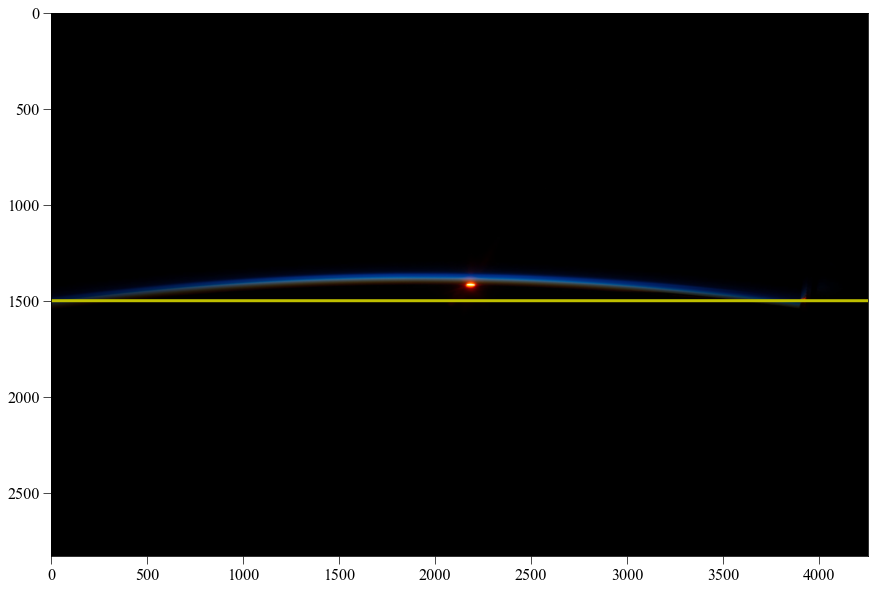

In [115]:
x = np.arange(im_arr.shape[1])
xc = x - int(len(x)*0.5)

y = limb_arc(xc, r=6.3e6, h=1) + 1500
plt.plot(x, y, c='y', lw=3)

plt.imshow(im_arr)
plt.show()

In [25]:
im_arr.shape

(2125, 8192, 3)

In [38]:
limb_arc(xc, r=6.3e6, h=1) + 1500

/var/folders/bt/hcx3fsms41nfk08g1d3xy8t40000gn/T/ipykernel_31802/1002530748.py:6: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(1 - b/c)


array([nan, nan, nan, ..., nan, nan, nan])

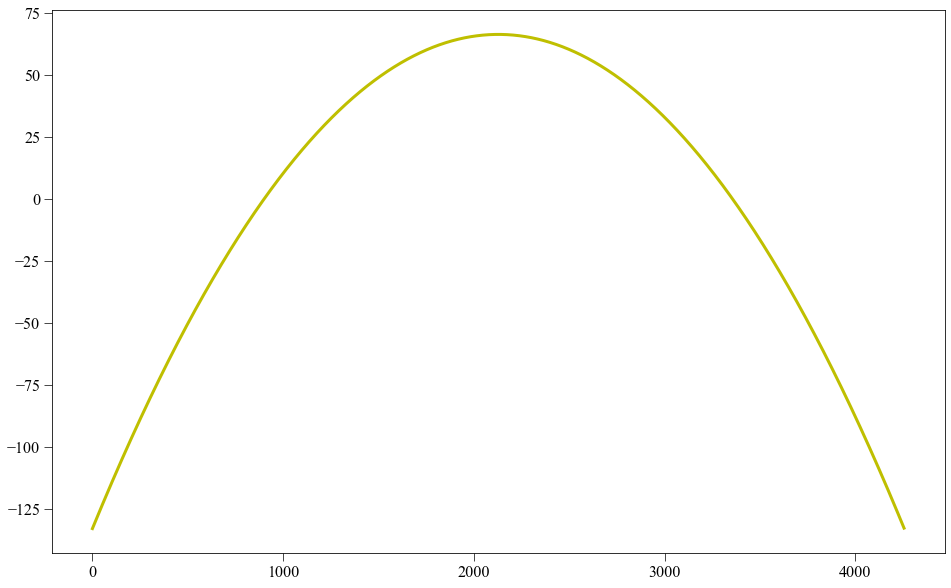

In [124]:
x = np.arange(im_arr.shape[1])
xc = x - int(len(x)*0.5)

y = limb_arc(xc, r=earth_r, h=iss_h, method='screen', screen_dist=1e9) + 1500
plt.plot(x, y-np.mean(y), c='y', lw=3)

In [89]:
iss_h = 418*1000 # up to 415-421km [418.552]
earth_r = 6.3e6

In [43]:
img = Image.open('demo/iss040e129950.jpg')
arry = img.getdata()
im_arr = np.fromstring(img.tobytes(), dtype=np.uint8)
im_arr = im_arr.reshape((img.size[1], img.size[0], 3)) 

/var/folders/bt/hcx3fsms41nfk08g1d3xy8t40000gn/T/ipykernel_31802/603171426.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr = np.fromstring(img.tobytes(), dtype=np.uint8)


In [88]:
6.3e6 / 8.5e4

74.11764705882354

In [96]:
pix_ratio = im_arr.shape[1] / im_arr.shape[0]

In [ ]:
limb_arc(x, r, h=h, method='screen', screen_dist=screen_dist)

In [202]:
cost_function(r=1e6, screen_dist=1e8, x_center=0, y_center=1500, 
              h=iss_h, second_deriv_sign=1)

array([-593.02729222, -592.17172478, -591.31655955, ...,  421.53820361,
        420.68344045,  419.82827522])

In [547]:
m._strategy = 2

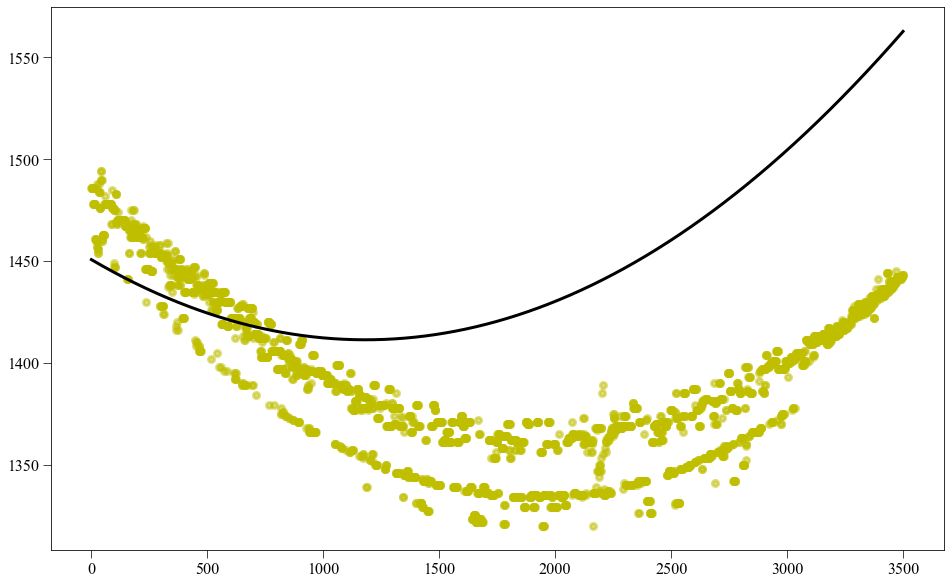

I SimplexBuilder    0 - FCN =        2811788525 Edm =       83312457.88 NCalls =     10
I SimplexBuilder    1 - FCN =        2811788525 Edm =       56466479.41 NCalls =     12
I SimplexBuilder    2 - FCN =        2618594220 Edm =       234332364.5 NCalls =     15
I SimplexBuilder    3 - FCN =        2618594220 Edm =       222134946.1 NCalls =     16
I SimplexBuilder    4 - FCN =        2618594220 Edm =       221286964.2 NCalls =     17
I SimplexBuilder    5 - FCN =        2618594220 Edm =       221286964.2 NCalls =     18
I SimplexBuilder    6 - FCN =        2618594220 Edm =       221286964.2 NCalls =     19
I SimplexBuilder    7 - FCN =        2618594220 Edm =       221286964.2 NCalls =     20
I SimplexBuilder    8 - FCN =        2618594220 Edm =       221286614.2 NCalls =     21
I SimplexBuilder    9 - FCN =        2618594220 Edm =       207735229.5 NCalls =     22
I SimplexBuilder   10 - FCN =        1991443396 Edm =       820345128.8 NCalls =     25
I SimplexBuilder   11 - FCN =   

I SimplexBuilder  100 - FCN =       4866372.287 Edm =       2522.653337 NCalls =    186
I SimplexBuilder  101 - FCN =       4866372.287 Edm =       1849.224606 NCalls =    188
I SimplexBuilder  102 - FCN =       4866215.971 Edm =       1767.173395 NCalls =    190
I SimplexBuilder  103 - FCN =       4866103.702 Edm =       1833.956894 NCalls =    192
I SimplexBuilder  104 - FCN =       4866103.702 Edm =       1596.655364 NCalls =    194
I SimplexBuilder  105 - FCN =       4866103.702 Edm =        838.122756 NCalls =    196
I SimplexBuilder  106 - FCN =       4865942.521 Edm =       814.6231683 NCalls =    198
I SimplexBuilder  107 - FCN =       4865928.305 Edm =       762.5827431 NCalls =    200
I SimplexBuilder  108 - FCN =       4865888.941 Edm =       697.1332932 NCalls =    202
I SimplexBuilder  109 - FCN =       4865888.941 Edm =       491.3348283 NCalls =    204
I SimplexBuilder  110 - FCN =       4865827.845 Edm =        544.442489 NCalls =    206
I SimplexBuilder  111 - FCN =   

I SimplexBuilder  199 - FCN =           4865690 Edm =   0.0004265028983 NCalls =    384
I SimplexBuilder  200 - FCN =           4865690 Edm =   0.0004540812224 NCalls =    386
I SimplexBuilder  201 - FCN =           4865690 Edm =   0.0003444626927 NCalls =    388
I SimplexBuilder  202 - FCN =           4865690 Edm =   0.0003650682047 NCalls =    390
I SimplexBuilder  203 - FCN =           4865690 Edm =   0.0002792794257 NCalls =    392
I SimplexBuilder  204 - FCN =           4865690 Edm =   0.0002884157002 NCalls =    394
I SimplexBuilder  205 - FCN =           4865690 Edm =   0.0001447368413 NCalls =    396
I SimplexBuilder  206 - FCN =           4865690 Edm =   0.0001578545198 NCalls =    398
I SimplexBuilder  207 - FCN =           4865690 Edm =   0.0001335777342 NCalls =    400
I SimplexBuilder  208 - FCN =           4865690 Edm =   0.0001321341842 NCalls =    402
I SimplexBuilder  209 - FCN =           4865690 Edm =    9.42517072e-05 NCalls =    404
I SimplexBuilder  210 - FCN =   

{'r': 7027454.5543443,
 'h': 418000.0,
 'f': 2.3852447794681098e-18,
 'px': 1.1853686139294273,
 'py': 1.3397038006939033,
 'x0': 0.0,
 'y0': 0.0,
 'theta_x': 3.0563371970953384,
 'theta_y': 0.0,
 'theta_z': -0.68166045251616,
 'origin_x': 2.10891968914654,
 'origin_y': 3.2416815431872514,
 'origin_z': 2.3354718310059397}

In [641]:
# resectioning 

target = breaks[:3500]
x = np.arange(len(target))

y = limb_arc(x, r=earth_r, h=iss_h, method='resection',
             f=1, px=1, py=3e-3, x0=0, y0=0,
             theta_x=np.pi, theta_y=0, theta_z=2e-4,
             origin_x=0, origin_y=809996, origin_z=0)
    
# rough guess
plt.plot(x, y, lw=3, c='k')
plt.scatter(x, target, c='y', lw=3, alpha=0.5)
plt.show()

def cost_function(r, h=iss_h,
                  f=1, px=1, py=3e-3, x0=0, y0=0,
                  theta_x=np.pi, theta_y=0, theta_z=2e-4,
                  origin_x=0, origin_y=809996, origin_z=0):
    
    y_pred = limb_arc(x, r=r, h=h,
                      f=f, px=px, py=py, x0=x0, y0=y0,
                      theta_x=theta_x, theta_y=theta_y, theta_z=theta_z,
                      origin_x=origin_x, origin_y=origin_y, origin_z=origin_z)

    return np.sum(abs(y_pred - target))
    
# def cost_function(r, screen_dist, x_center, y_center,
#                   h=iss_h, second_deriv_sign=-1):
#     y_pred = fancy_limb_arc(np.arange(len(target)), r, screen_dist, x_center, y_center,
#                             h=h, second_deriv_sign=second_deriv_sign)
#     return np.sum(abs(y_pred - target))

cost_function.errordef = Minuit.LEAST_SQUARES
# cost_function.errordef = Minuit.LIKELIHOOD

# m = Minuit(cost_function, r=earth_r, h=iss_h,
#            f=1, px=1, py=3e-3, x0=0, y0=0,
#            theta_x=np.pi, theta_y=0, theta_z=2e-4,
#            origin_x=0, origin_y=809996, origin_z=0)

m = Minuit(cost_function, r=earth_r, h=iss_h,
           f=1, px=1, py=1, x0=0, y0=0,
           theta_x=np.pi, theta_y=0, theta_z=0,
           origin_x=0, origin_y=0, origin_z=0)

# m.fixed = False # release all parameters
m.fixed["h"] = True
# m.fixed["x0"] = True
# m.fixed["y0"] = True
m.fixed["theta_y"] = True

m.limits["theta_x"] = (-np.pi, np.pi)
# m.limits["theta_y"] = (-np.pi, np.pi)
m.limits["theta_z"] = (-np.pi, np.pi)

m.limits["f"] = (0, None)
m.limits["px"] = (0, None)
m.limits["py"] = (0, None)

# m.limits["origin_x"] = (-np.pi, np.pi)
# m.limits["origin_y"] = (-np.pi, np.pi)
# m.limits["origin_z"] = (-np.pi, np.pi)

m.limits["r"] = (1e5, 1e8)
m.print_level = 2
m._tolerance = 1e-6
m._strategy = 2
m.errordef = 1
# m.tol = 1e-7

m.simplex(ncall=int(1e5))  # run optimiser
# m.simplex()
# m.minos()
print(m.values)

m.hesse()   # run covariance estimator
print(m.errors)

fit = m.values.to_dict()
fit

In [300]:
# fancy version

# target = breaks[:3500]

# def fancy_limb_arc(x, r, screen_dist, x_center, y_center,
#                    h=iss_h, second_deriv_sign=-1):
# #     x = np.arange(len(y))
# #     x = x - int(len(x)*0.5) - x_center
#     arc = limb_arc(x - x_center, r=r, h=h,
#                    method='screen', screen_dist=screen_dist)
#     arc = second_deriv_sign * (arc - np.nanmean(arc)) + y_center
        
#     return arc
    
# # y = fancy_limb_arc(np.arange(len(target)), earth_r, 1e9, 1700, 1400, h=iss_h, second_deriv_sign=-1)
# # plt.plot(np.arange(len(target)), y, lw=3, c='k')
# # plt.scatter(np.arange(len(target)), target, c='y', lw=3, alpha=0.5)

# def cost_function(r, screen_dist, x_center, y_center,
#                   h=iss_h, second_deriv_sign=-1):
#     y_pred = fancy_limb_arc(np.arange(len(target)), r, screen_dist, x_center, y_center,
#                             h=h, second_deriv_sign=second_deriv_sign)
#     return np.sum(abs(y_pred - target))

# cost_function.errordef = Minuit.LEAST_SQUARES

# m = Minuit(cost_function, r=1e6, screen_dist=1, x_center=len(target)*0.5, y_center=1500, 
#            h=iss_h, second_deriv_sign=-1)

# # m.fixed = False # release all parameters
# m.fixed["second_deriv_sign"] = True
# m.fixed["h"] = True
# m.limits["x_center"] = (0, len(target))
# m.limits["y_center"] = (1200, 1700)
# m.limits["screen_dist"] = (1e-3, 1e12)
# m.limits["r"] = (1e5, 1e8)
# m.print_level = 1

# m.simplex()  # run optimiser
# print(m.values)  # x: 2, y: 3, z: 4

# m.hesse()   # run covariance estimator
# print(m.errors)  # x: 1, y: 1, z: 1

# fit = m.values.to_dict()
# fit

<ValueView r=452031.54663343215 screen_dist=1688025.6394062063 x_center=1937.648311526146 y_center=1395.7454925790496 h=418000.0 second_deriv_sign=-1.0>
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0170013
<ErrorView r=3364.0392335882934 screen_dist=42428.127557179774 x_center=2.1533894647132 y_center=0.07077386269486396 h=4180.0 second_deriv_sign=-0.01>


{'r': 452031.54663343215,
 'screen_dist': 1688025.6394062063,
 'x_center': 1937.648311526146,
 'y_center': 1395.7454925790496,
 'h': 418000.0,
 'second_deriv_sign': -1.0}

In [643]:
fit['r'], earth_r

(7027454.5543443, 6300000.0)

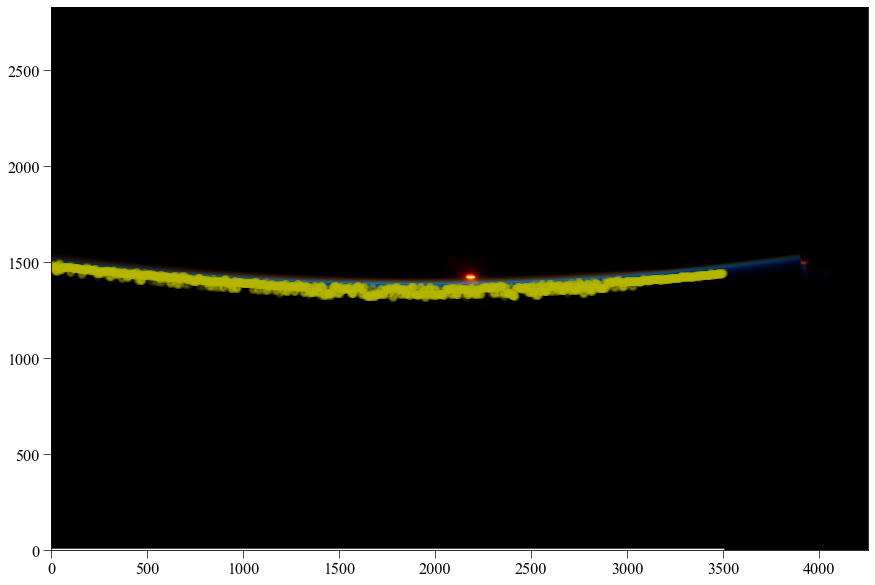

In [642]:
y = limb_arc(x, **fit)

plt.imshow(im_arr, origin='lower')
plt.plot(np.arange(len(target)), y, lw=3, c='w')
plt.scatter(np.arange(len(target)), target, c='y', lw=3, alpha=0.1)

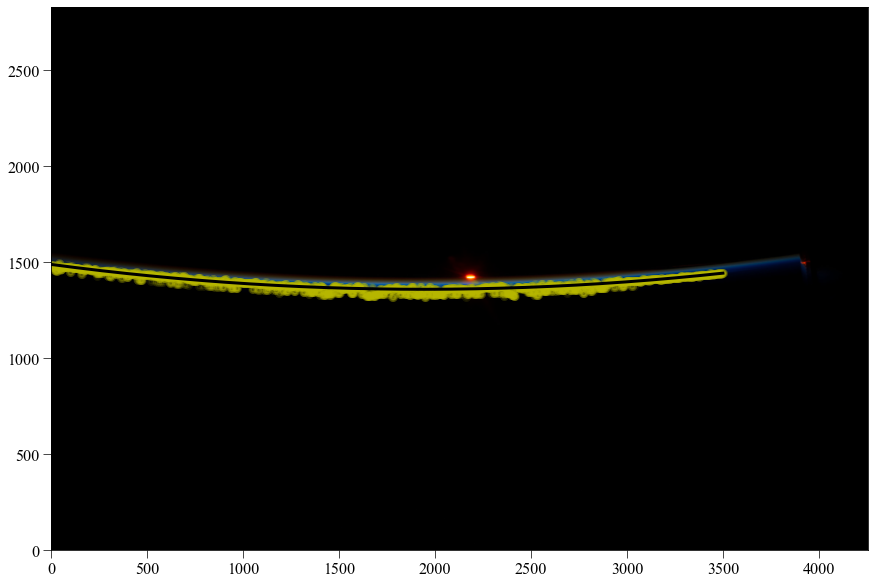

In [305]:
# y = fancy_limb_arc(np.arange(len(target)), fit['r'], fit['screen_dist'], fit['x_center'], fit['y_center'],
#                    h=iss_h, second_deriv_sign=-1)


# plt.imshow(im_arr, origin='lower')
# plt.plot(np.arange(len(target)), y, lw=3, c='k')
# plt.scatter(np.arange(len(target)), target, c='y', lw=3, alpha=0.1)

In [310]:
def intrinsic_transform(x_world, y_world, z_world, f=1, px=1, py=1, x0=0, y0=0):
    Mi = np.array([
        [f/px, 0, x0, 0],
        [0, f/py, y0, 0],
        [0, 0, 1, 0]
    ])
    
    world_coords = np.array([x_world, y_world, z_world, 1])
    
    camera_coords = np.matmul(Mi, world_coords)
    
    return camera_coords



intrinsic_transform(10, 10, 10, px=1, py=2)

array([10.,  5., 10.])

In [311]:
y

array([1488.74698407, 1488.61345215, 1488.47998915, ..., 1443.15094068,
       1443.25846809, 1443.36606443])

In [146]:
grad = np.log10(abs(np.gradient(im_arr.sum(axis=2), axis=0)))

/var/folders/bt/hcx3fsms41nfk08g1d3xy8t40000gn/T/ipykernel_31802/4206736744.py:1: RuntimeWarning: divide by zero encountered in log10
  grad = np.log10(abs(np.gradient(im_arr.sum(axis=2), axis=0)))


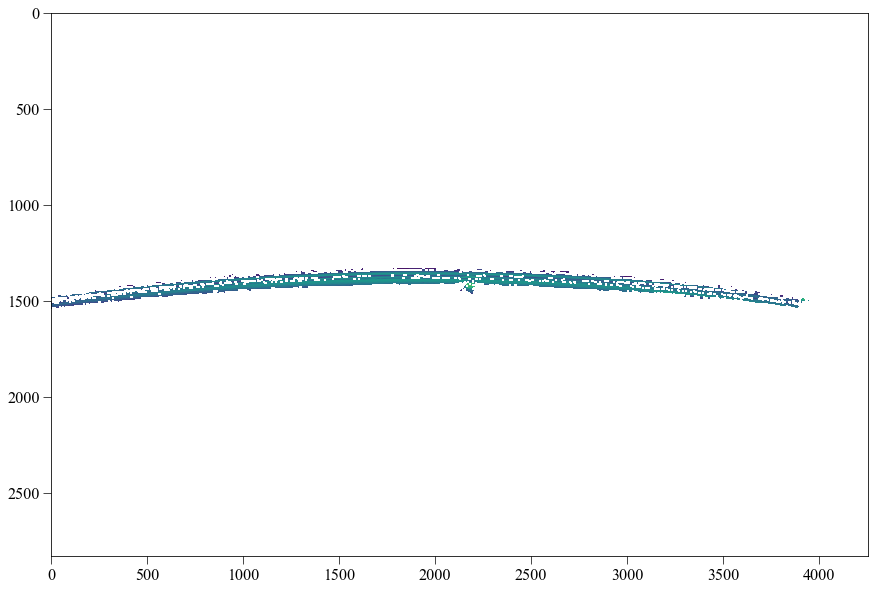

In [147]:
plt.imshow(grad)
plt.show()

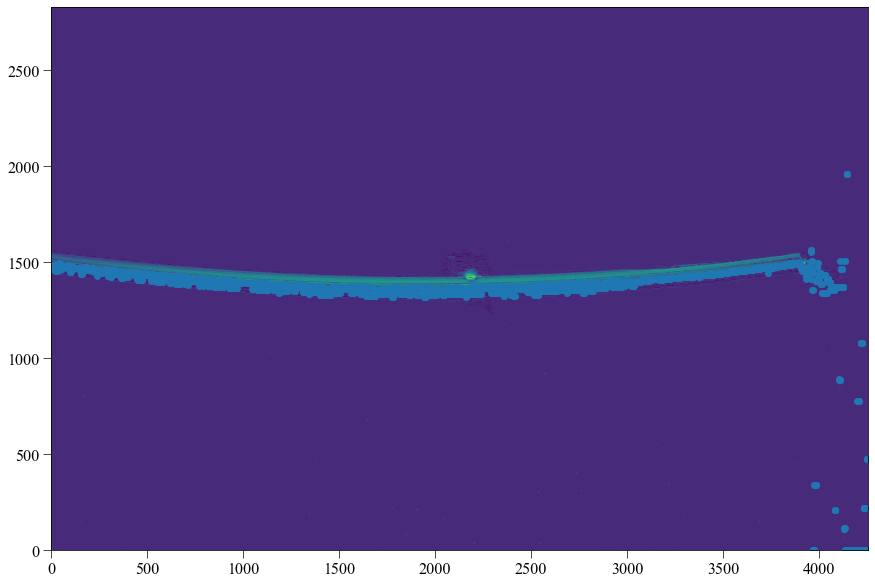

In [159]:
plt.imshow(grad, origin='lower')

breaks = find_break(grad)
plt.scatter(np.arange(grad.shape[1]), breaks)
plt.show()

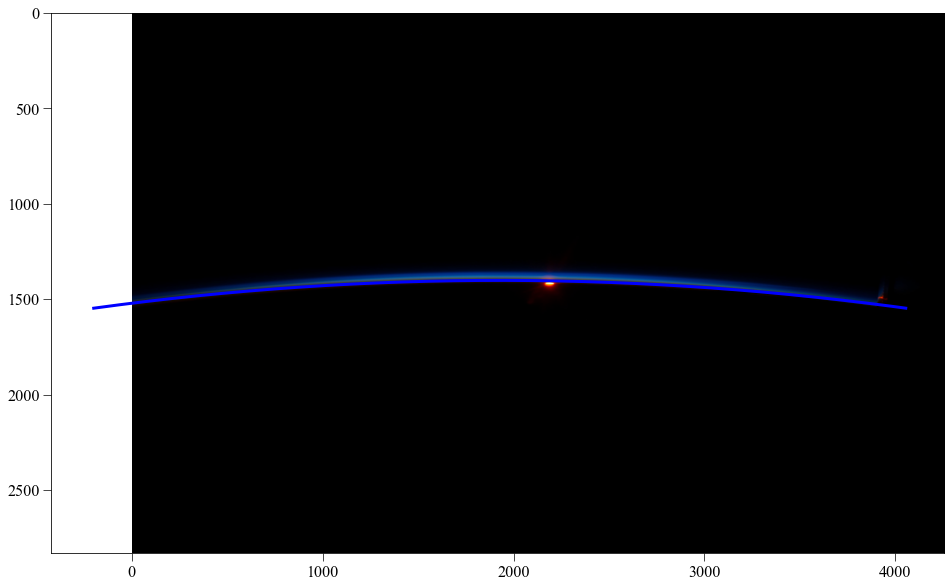

In [167]:
plt.imshow(im_arr)

x = np.arange(im_arr.shape[1])
xc = x - int(len(x)*0.5)
y = limb_arc(xc / pix_ratio, r=8.5e4, h=iss_h)
ye = limb_arc(xc, r=earth_r*1.2, h=iss_h, method='screen', screen_dist=1e9)

# plt.plot(x - 200, np.mean(y) - y + 1450, c='y', lw=3)
plt.plot(x - 200, np.mean(ye) - ye + 1450, c='b', lw=3)

plt.show()

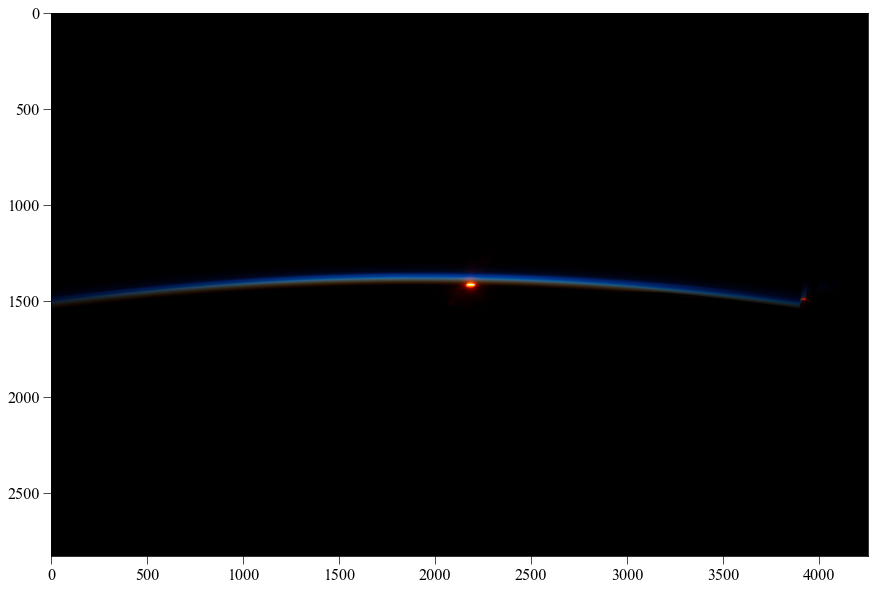

In [308]:
plt.imshow(im_arr)

In [168]:
np.mean(ye)

337103949.9825986

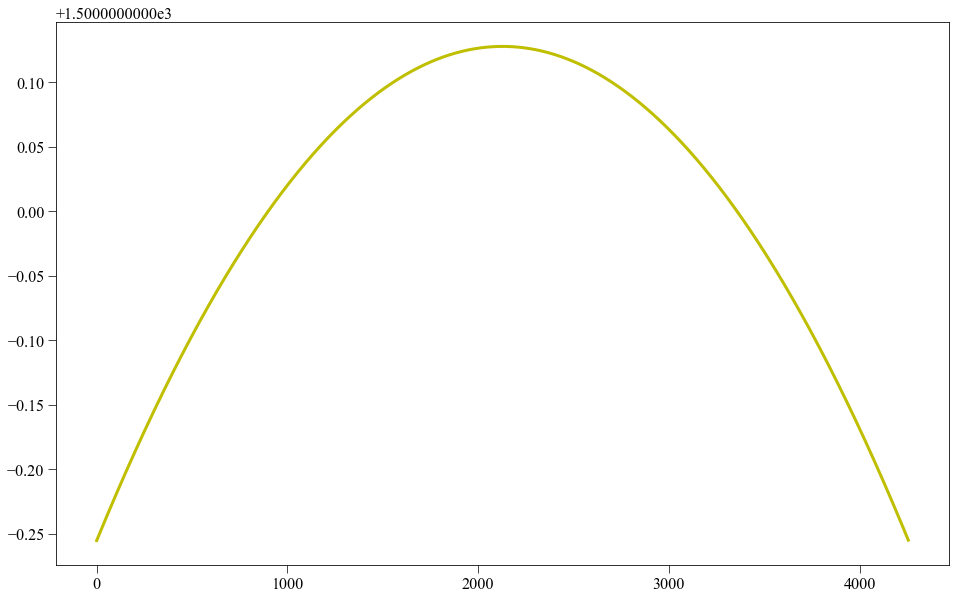

In [100]:
x = np.arange(im_arr.shape[1])
xc = x - int(len(x)*0.5)
y = limb_arc(xc, r=earth_r, h=iss_h)
plt.plot(x, y-np.mean(y)+1500, c='y', lw=3)


In [ ]:
true_coefs = torch.tensor([[1.], [2.]])

data = torch.randn((2, 1))

dim = 1

labels = dist.Bernoulli(logits=(true_coefs * data).sum(-1)).sample()


def dummy(x, y, n=1):
    return 2*x + 5*y


def model(data):

#     coefs_mean = torch.zeros(dim)
    coeffs_mean = torch.zeros((2, dim))
    coeffs_std = torch.ones(2, dim)

#     coefs = pyro.sample('beta', dist.Normal(coefs_mean, torch.ones(3)))
#     coefs = pyro.sample('beta', dist.Normal(coefs_mean, torch.ones(2, dim)))

#     y = pyro.sample('y', dist.Bernoulli(logits=(coefs * data).sum(-1)), obs=labels)
    coeffs = pyro.sample('normal', dist.Normal(coeffs_mean, coeffs_std))
    y = pyro.sample('y', dummy(*coeffs), obs=labels)

    return y

# hmc_kernel = HMC(model, step_size=0.0855, num_steps=4)

# mcmc = MCMC(hmc_kernel, num_samples=500, warmup_steps=100)

# mcmc_run = mcmc.run(data)

# mcmc.get_samples()['beta'].mean()  
# # torch.tensor([ 0.9819,  1.9258,  2.9737])
# posterior = mcmc_run.marginal('beta').empirical['beta']
# posterior.mean  # doctest: +SKIP
# # tensor([ 0.9819,  1.9258,  2.9737])

hmc_kernel = HMC(model, step_size=0.0855, num_steps=4)
mcmc = MCMC(hmc_kernel, num_samples=1000, warmup_steps=100)
mcmc.run(data)
mcmc.summary()
# posterior = mcmc_run.marginal('beta').empirical['beta']
# posterior.mean  # doctest: +SKIP

In [753]:
def dummy(x, y, n=1):
    return 2*x + 5*y

thing = pyro.sample('beta', dist.Normal(torch.zeros((2, dim)), torch.ones(2, dim)))
# x, y = thing
dummy(*thing)

tensor([-1.4693])

In [727]:
dist.Bernoulli(logits=(torch.zeros((2, dim)) * data).sum(-1)).sample()

tensor([0., 0.])

In [728]:
labels

tensor([0., 1.])

In [729]:
dist.Bernoulli(logits=(true_coefs * data).sum(-1)).sample()

tensor([1., 1.])

In [756]:
true_coefs = torch.tensor([1., 2., 3.])
data = torch.randn(2000, 3)
dim = 3
labels = dist.Bernoulli(logits=(true_coefs * data).sum(-1)).sample()
def model(data):
    coefs_mean = torch.zeros(dim)
    coefs = pyro.sample('beta', dist.Normal(coefs_mean, torch.ones(3)))
    y = pyro.sample('y', dist.Bernoulli(logits=(coefs * data).sum(-1)), obs=labels)
    return y
hmc_kernel = HMC(model, step_size=0.0855, num_steps=4)
mcmc = MCMC(hmc_kernel, num_samples=1000, warmup_steps=100)
mcmc.run(data)
mcmc.summary()
# mcmc_run = mcmc.run(data)
# posterior = mcmc.marginal('beta').empirical['beta']
# posterior.mean  # doctest: +SKIP
# tensor([ 0.9819,  1.9258,  2.9737])

Sample: 100%|███████████████████████████████████████| 1100/1100 [00:02, 538.48it/s, step size=5.92e-01, acc. prob=0.930]                                             


                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]      1.12      0.08      1.12      0.98      1.24    111.27      1.01
   beta[1]      2.04      0.10      2.04      1.87      2.20     43.13      1.00
   beta[2]      3.08      0.14      3.09      2.85      3.30     27.30      1.00

Number of divergences: 0


In [656]:
MCMC(hmc_kernel, num_samples=500, warmup_steps=100).run(data)

ValueError: Must provide valid initial parameters to begin sampling when using `potential_fn` in HMC/NUTS kernel.

In [646]:
dist.Bernoulli(logits=(coefs * data).sum(-1))

NameError: name 'coefs' is not defined

In [627]:
import torch
from pyro.infer.mcmc.api import HMC, MCMC
import pyro.distributions as dist

In [618]:
import torch.distributions as dist

In [623]:
import pyro

In [ ]:
y_pred = limb_arc(x, r=r, h=h,
                  f=f, px=px, py=py, x0=x0, y0=y0,
                  theta_x=theta_x, theta_y=theta_y, theta_z=theta_z,
                  origin_x=origin_x, origin_y=origin_y, origin_z=origin_z)

In [624]:


dim = 13

labels = target

def model(data):

    coefs_mean = torch.zeros(dim)

    coefs = pyro.sample('beta', dist.Normal(coefs_mean, torch.ones(3)))

    y = pyro.sample('y', dist.Bernoulli(logits=(coefs * data).sum(-1)), obs=labels)
    y = pyro.sample('y', limb_arc(**kwargs), obs=labels)

    return y

hmc_kernel = HMC(model, step_size=0.0855, num_steps=4)

mcmc = MCMC(hmc_kernel, num_samples=500, warmup_steps=100)

mcmc.run(data)

mcmc.get_samples()['beta'].mean(0)  
torch.tensor([ 0.9819,  1.9258,  2.9737])

<module 'pyro.infer.mcmc.api' from '/Users/banderson/Projects/bogs/planet-ruler/venv/lib/python3.9/site-packages/pyro/infer/mcmc/api.py'>

In [633]:
target

array([1486, 1486, 1486, ..., 1443, 1443, 1443])